# Importing the required packages:

In [14]:
import math
import numpy as np
import pandas as pd

## Data Visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

## Machine Learning
import sklearn.metrics as sklm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics
import seaborn as sns
## Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Read the DataSets

In [15]:
train = pd.read_csv("dataset/DAT102x_Predicting_Heart_Disease_Mortality_-_Training_values.csv")
label = pd.read_csv("dataset/DAT102x_Predicting_Heart_Disease_Mortality_-_Training_labels.csv")

test = pd.read_csv("dataset/DAT102x_Predicting_Heart_Disease_Mortality_-_Test_values.csv")
test_Id = test["row_id"]

In [16]:
train.head()

,row_id,area__rucc,area__urban_influence,econ__economic_typology,econ__pct_civilian_labor,econ__pct_unemployment,econ__pct_uninsured_adults,econ__pct_uninsured_children,demo__pct_female,demo__pct_below_18_years_of_age,...,health__pct_diabetes,health__pct_low_birthweight,health__pct_excessive_drinking,health__pct_physical_inacticity,health__air_pollution_particulate_matter,health__homicides_per_100k,health__motor_vehicle_crash_deaths_per_100k,health__pop_per_dentist,health__pop_per_primary_care_physician,yr
0,0,Metro - Counties in metro areas of fewer than ...,Small-in a metro area with fewer than 1 millio...,Manufacturing-dependent,0.408,0.057,0.254,0.066,0.516,0.235,...,0.131,0.089,NaN,0.332,13.0,2.80,15.09,1650.0,1489.0,a
1,1,Metro - Counties in metro areas of fewer than ...,Small-in a metro area with fewer than 1 millio...,Mining-dependent,0.556,0.039,0.260,0.143,0.503,0.272,...,0.090,0.082,0.181,0.265,10.0,2.30,19.79,2010.0,2480.0,a
2,4,Metro - Counties in metro areas of 1 million p...,Large-in a metro area with at least 1 million ...,Nonspecialized,0.541,0.057,0.070,0.023,0.522,0.179,...,0.084,0.098,0.195,0.209,10.0,9.31,3.14,629.0,690.0,b
3,5,"Nonmetro - Urban population of 2,500 to 19,999...",Noncore adjacent to a small metro with town of...,Nonspecialized,0.500,0.061,0.203,0.059,0.525,0.200,...,0.104,0.058,NaN,0.238,13.0,NaN,NaN,1810.0,6630.0,b
4,6,"Nonmetro - Urban population of 2,500 to 19,999...",Noncore not adjacent to a metro/micro area and...,Nonspecialized,0.471,0.050,0.225,0.103,0.511,0.237,...,0.137,0.070,0.194,0.290,9.0,NaN,29.39,3489.0,2590.0,a


# Data Cleaning:
Checking the data sets contains the duplicate values or not

In [17]:
print(train.shape)
print(train.row_id.unique().shape)

(3198, 34)
(3198,)


In [18]:
print(test.shape)
print(test.row_id.unique().shape)

(3080, 34)
(3080,)


# Combining the train and test Data

In [19]:
full = pd.concat([train, test], axis = 0)
print(len(full))

6278


# Checking for any missing values in the data set

In [20]:
full_NA = full.isnull().sum()
full_NA = full_NA.drop(full_NA[full_NA == 0].index).sort_values(ascending = False)

print(full_NA)

health__homicides_per_100k                     3797
health__pct_excessive_drinking                 1838
health__pct_adult_smoking                       866
health__motor_vehicle_crash_deaths_per_100k     762
health__pop_per_dentist                         442
health__pop_per_primary_care_physician          414
health__pct_low_birthweight                     329
health__air_pollution_particulate_matter         66
demo__pct_non_hispanic_african_american          10
econ__pct_uninsured_children                     10
demo__pct_female                                 10
demo__pct_below_18_years_of_age                  10
demo__pct_aged_65_years_and_older                10
demo__pct_hispanic                               10
health__pct_adult_obesity                        10
demo__pct_non_hispanic_white                     10
demo__pct_american_indian_or_alaskan_native      10
demo__pct_asian                                  10
health__pct_diabetes                             10
health__pct_

# Inserting the missing values with their respective median value

In [21]:
full["health__homicides_per_100k"].fillna(full["health__homicides_per_100k"].median(), inplace=True)
full["health__pct_excessive_drinking"].fillna(full["health__pct_excessive_drinking"].median(), inplace=True)
full["health__pct_adult_smoking"].fillna(full["health__pct_adult_smoking"].median(), inplace=True)
full["health__motor_vehicle_crash_deaths_per_100k"].fillna(full["health__motor_vehicle_crash_deaths_per_100k"].median(), inplace=True)
full["health__pop_per_dentist"].fillna(full["health__pop_per_dentist"].median(), inplace=True)
full["health__pop_per_primary_care_physician"].fillna(full["health__pop_per_primary_care_physician"].median(), inplace=True)
full["health__pct_low_birthweight"].fillna(full["health__pct_low_birthweight"].median(), inplace=True)
full["health__air_pollution_particulate_matter"].fillna(full["health__air_pollution_particulate_matter"].median(), inplace=True)
full["demo__pct_non_hispanic_african_american"].fillna(full["demo__pct_non_hispanic_african_american"].median(), inplace=True)
full["econ__pct_uninsured_children"].fillna(full["econ__pct_uninsured_children"].median(), inplace=True)
full["demo__pct_female"].fillna(full["demo__pct_female"].median(), inplace=True)
full["demo__pct_below_18_years_of_age"].fillna(full["demo__pct_below_18_years_of_age"].median(), inplace=True)
full["demo__pct_aged_65_years_and_older"].fillna(full["demo__pct_aged_65_years_and_older"].median(), inplace=True)
full["demo__pct_hispanic"].fillna(full["demo__pct_hispanic"].median(), inplace=True)
full["health__pct_adult_obesity"].fillna(full["health__pct_adult_obesity"].median(), inplace=True)
full["demo__pct_non_hispanic_white"].fillna(full["demo__pct_non_hispanic_white"].median(), inplace=True)
full["demo__pct_american_indian_or_alaskan_native"].fillna(full["demo__pct_american_indian_or_alaskan_native"].median(), inplace=True)
full["demo__pct_asian"].fillna(full["demo__pct_asian"].median(), inplace=True)
full["health__pct_diabetes"].fillna(full["health__pct_diabetes"].median(), inplace=True)
full["health__pct_physical_inacticity"].fillna(full["health__pct_physical_inacticity"].median(), inplace=True)
full["econ__pct_uninsured_adults"].fillna(full["econ__pct_uninsured_adults"].median(), inplace=True)

# Now the cleaned data is available and split the data into training data and tesinting data for analysis

In [22]:
train = full[:train.shape[0]]
test = full[train.shape[0]:]

# Now Merging the target label with the training data for further analysis

In [23]:
train = pd.merge(train, label, on = "row_id")
label = label["heart_disease_mortality_per_100k"]

In [24]:
##droping the row_id  for statistical analysis
train.drop(["row_id"], axis=1, inplace=True)
test.drop(["row_id"], axis=1, inplace=True)

train.describe()

,econ__pct_civilian_labor,econ__pct_unemployment,econ__pct_uninsured_adults,econ__pct_uninsured_children,demo__pct_female,demo__pct_below_18_years_of_age,demo__pct_aged_65_years_and_older,demo__pct_hispanic,demo__pct_non_hispanic_african_american,demo__pct_non_hispanic_white,...,health__pct_diabetes,health__pct_low_birthweight,health__pct_excessive_drinking,health__pct_physical_inacticity,health__air_pollution_particulate_matter,health__homicides_per_100k,health__motor_vehicle_crash_deaths_per_100k,health__pop_per_dentist,health__pop_per_primary_care_physician,heart_disease_mortality_per_100k
count,3198.000000,3198.000000,3198.000000,3198.000000,3198.000000,3198.000000,3198.000000,3198.000000,3198.000000,3198.000000,...,3198.000000,3198.000000,3198.000000,3198.000000,3198.000000,3198.000000,3198.000000,3198.000000,3198.000000,3198.000000
mean,0.467191,0.059696,0.217460,0.086061,0.498814,0.227715,0.170041,0.090173,0.091003,0.770040,...,0.109259,0.083674,0.164278,0.277161,11.629143,5.118690,20.868881,3371.392433,2509.457473,279.369293
std,0.074400,0.022947,0.067341,0.039837,0.024392,0.034271,0.043681,0.142725,0.147130,0.207795,...,0.023209,0.021627,0.042059,0.052987,1.551550,3.189238,9.801872,2478.276184,2029.080422,58.953338
min,0.207000,0.010000,0.046000,0.012000,0.278000,0.092000,0.045000,0.000000,0.000000,0.053000,...,0.032000,0.033000,0.038000,0.090000,7.000000,-0.400000,3.140000,339.000000,189.000000,109.000000
25%,0.420000,0.044000,0.166000,0.057000,0.493000,0.206000,0.141250,0.019000,0.006000,0.649250,...,0.094000,0.069000,0.146000,0.243000,10.000000,4.600000,14.522500,1879.000000,1462.250000,237.000000
50%,0.468000,0.057000,0.216000,0.077000,0.503000,0.226000,0.167000,0.035000,0.022000,0.853000,...,0.109000,0.080000,0.163000,0.280000,12.000000,4.600000,19.110000,2644.500000,1969.000000,275.000000
75%,0.514000,0.072000,0.261000,0.106000,0.512000,0.246000,0.195000,0.087000,0.096000,0.936000,...,0.124000,0.094000,0.181750,0.313000,13.000000,4.600000,25.220000,3889.000000,2749.000000,317.000000
max,1.000000,0.248000,0.496000,0.281000,0.573000,0.417000,0.346000,0.932000,0.858000,0.990000,...,0.203000,0.238000,0.367000,0.442000,15.000000,50.490000,110.450000,28130.000000,23399.000000,512.000000


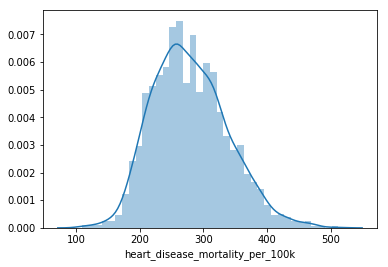

In [25]:
##Visualize the distribution of mortality rate of heart disease
sns.distplot(train.heart_disease_mortality_per_100k)
plt.show()

# Finding the correlation:

In [27]:
##finding the all features correlation with the heart disease and knows which feature has the strong relationship with the heart disease
corr = train.corr()

corr.sort_values(["heart_disease_mortality_per_100k"], ascending = False, inplace = True)
print(corr.heart_disease_mortality_per_100k)

heart_disease_mortality_per_100k                    1.000000
health__pct_physical_inacticity                     0.649813
health__pct_diabetes                                0.631337
health__pct_adult_obesity                           0.593316
demo__pct_adults_less_than_a_high_school_diploma    0.527382
health__pct_low_birthweight                         0.464391
health__pct_adult_smoking                           0.463138
demo__death_rate_per_1k                             0.444757
health__motor_vehicle_crash_deaths_per_100k         0.435633
demo__pct_adults_with_high_school_diploma           0.428137
demo__pct_non_hispanic_african_american             0.375537
econ__pct_unemployment                              0.371620
econ__pct_uninsured_adults                          0.334027
health__pop_per_dentist                             0.292447
health__homicides_per_100k                          0.292377
health__pop_per_primary_care_physician              0.217936
health__air_pollution_pa

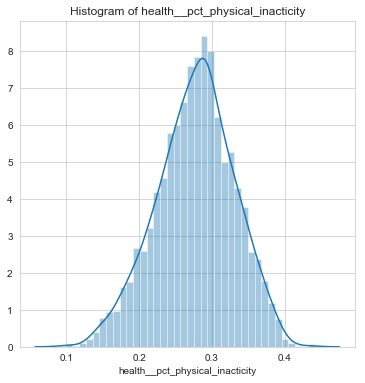

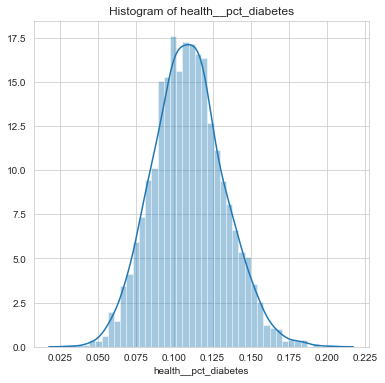

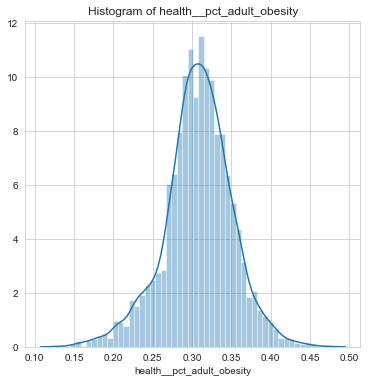

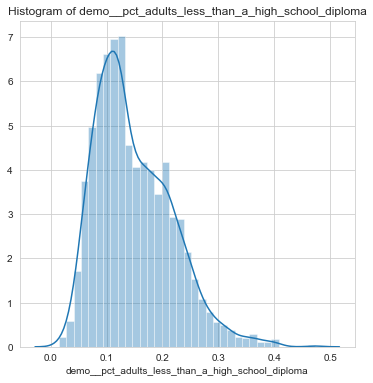

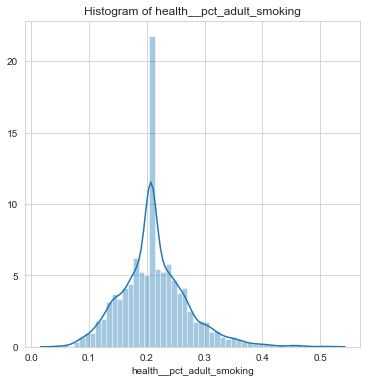

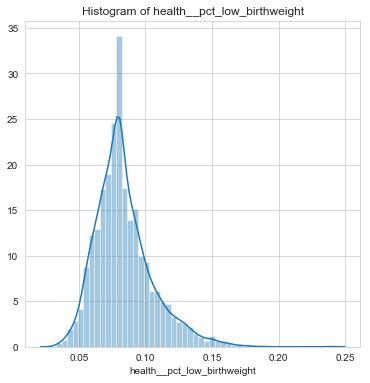

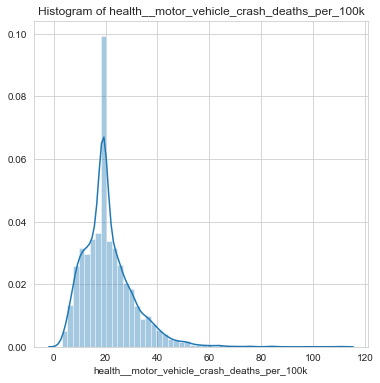

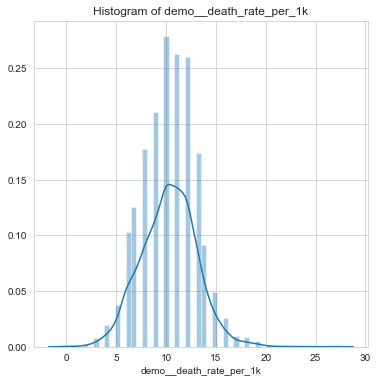

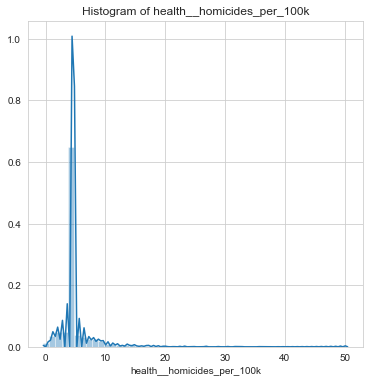

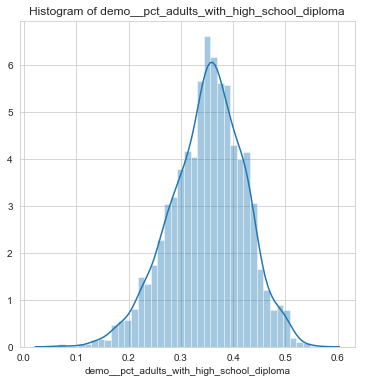

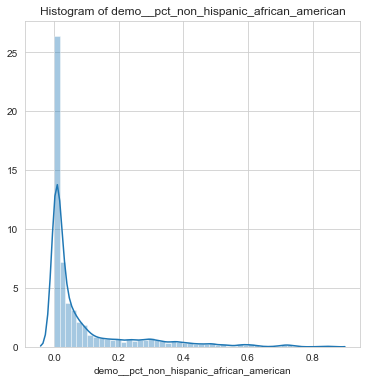

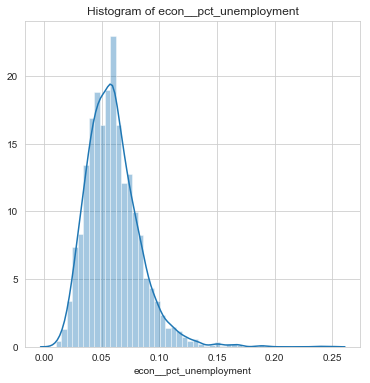

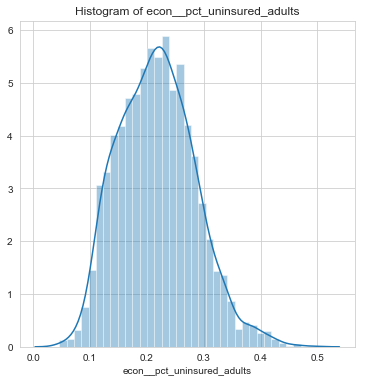

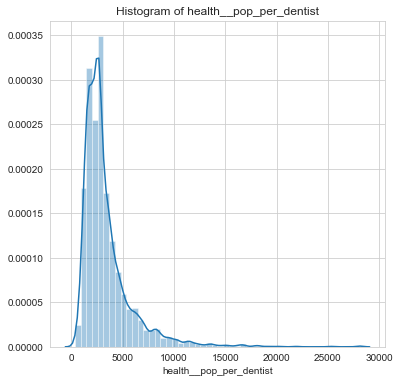

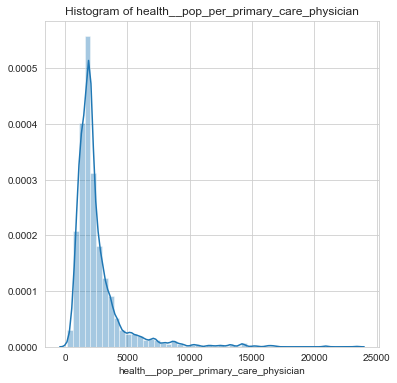

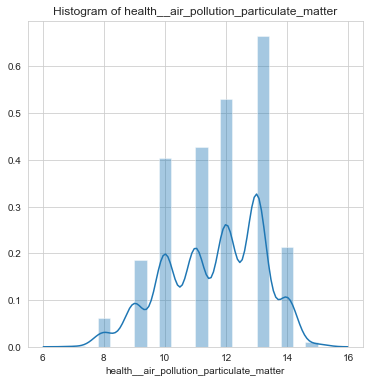

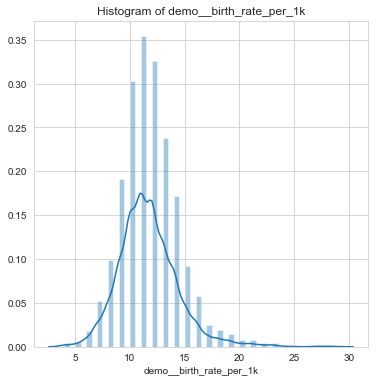

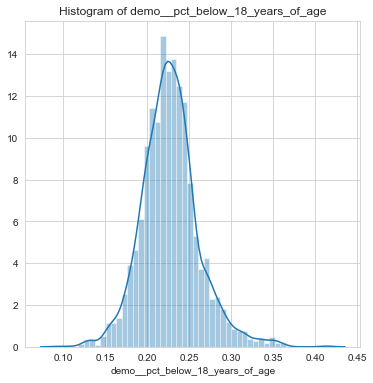

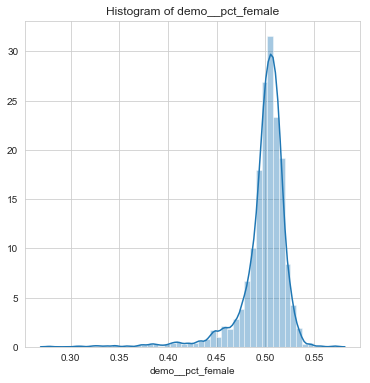

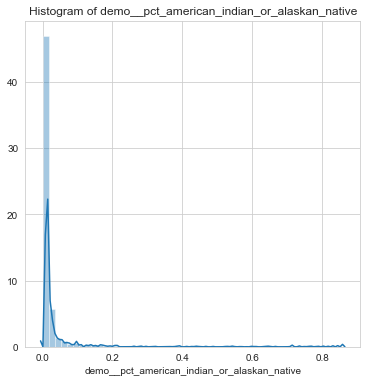

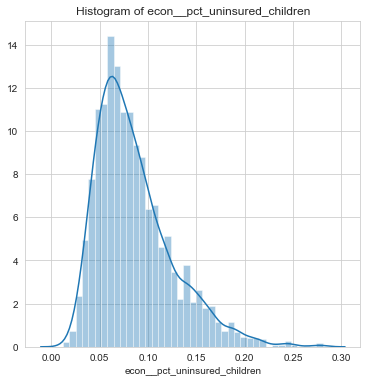

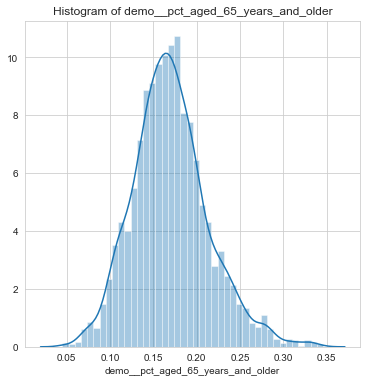

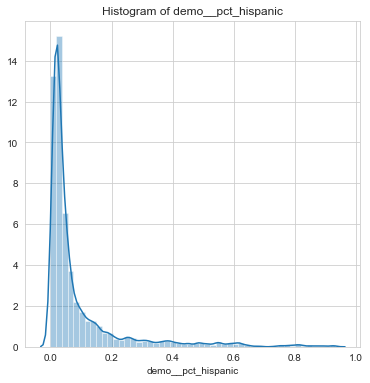

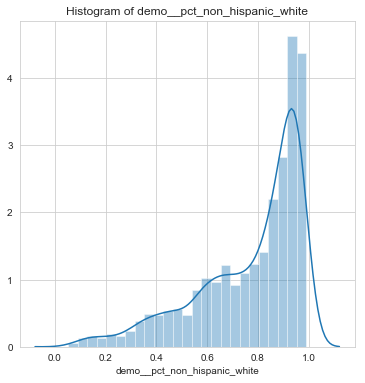

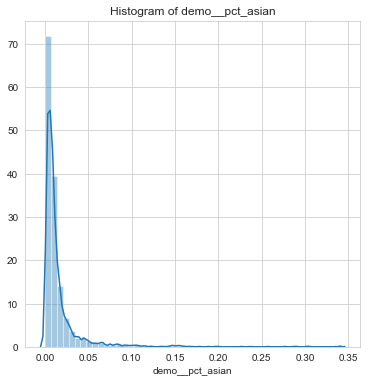

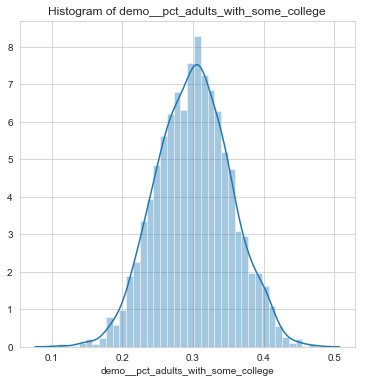

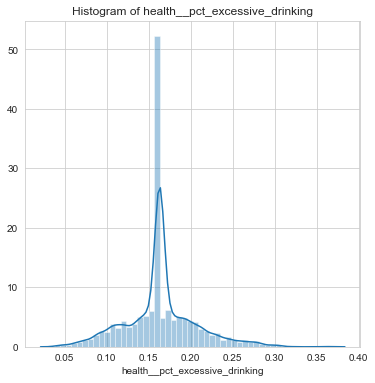

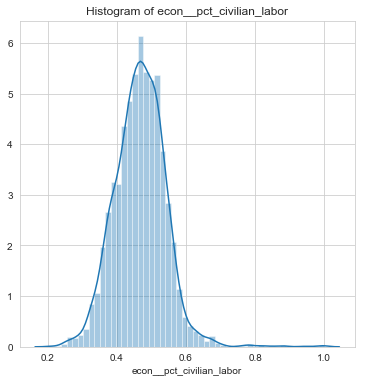

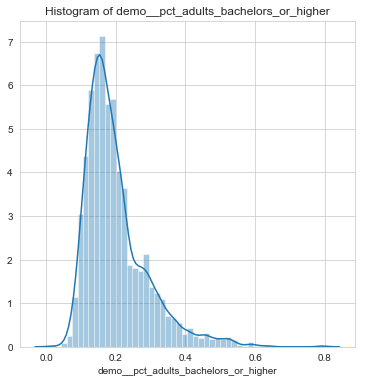

In [28]:
# Now creating the density plot distribution to every feature to see thier distribution
def plot_density_hist(train, cols, bins = 10, hist = True):
    for col in cols:
        fig = plt.figure(figsize = (6,6))
        sns.set_style("whitegrid")
        sns.distplot(train[col].dropna(), hist = hist)
        plt.title("Histogram of " + col)
        plt.xlabel(col)
        plt.ylabel("")
        plt.show

num_cols = ["health__pct_physical_inacticity", "health__pct_diabetes", "health__pct_adult_obesity", "demo__pct_adults_less_than_a_high_school_diploma",
           "health__pct_adult_smoking", "health__pct_low_birthweight", "health__motor_vehicle_crash_deaths_per_100k", "demo__death_rate_per_1k",
           "health__homicides_per_100k", "demo__pct_adults_with_high_school_diploma", "demo__pct_non_hispanic_african_american",
            "econ__pct_unemployment", "econ__pct_uninsured_adults", "health__pop_per_dentist", "health__pop_per_primary_care_physician",
            "health__air_pollution_particulate_matter", "demo__birth_rate_per_1k", "demo__pct_below_18_years_of_age", "demo__pct_female",
            "demo__pct_american_indian_or_alaskan_native", "econ__pct_uninsured_children", "demo__pct_aged_65_years_and_older", "demo__pct_hispanic",
            "demo__pct_non_hispanic_white", "demo__pct_asian", "demo__pct_adults_with_some_college", "health__pct_excessive_drinking",
            "econ__pct_civilian_labor", "demo__pct_adults_bachelors_or_higher"]
plot_density_hist(train, num_cols)

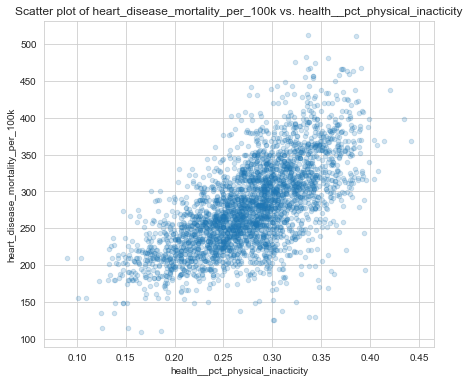

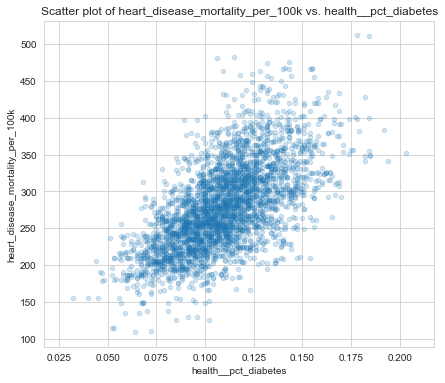

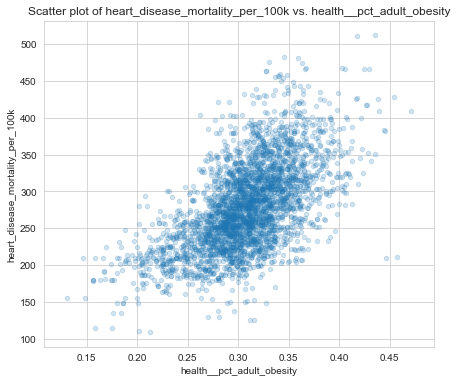

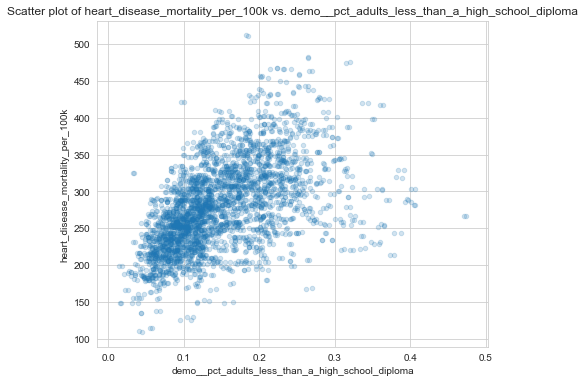

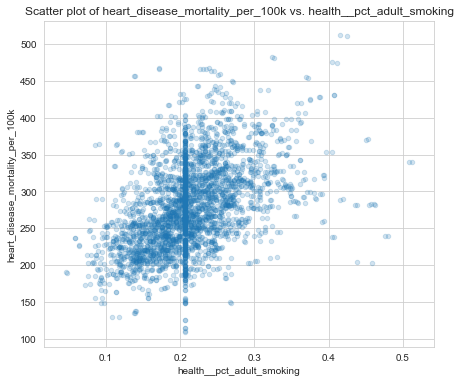

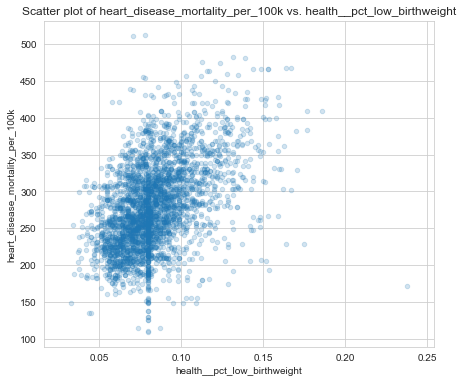

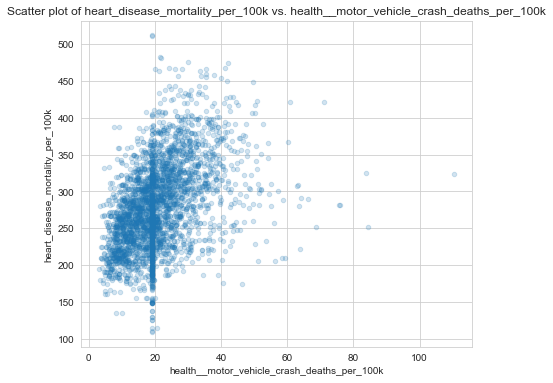

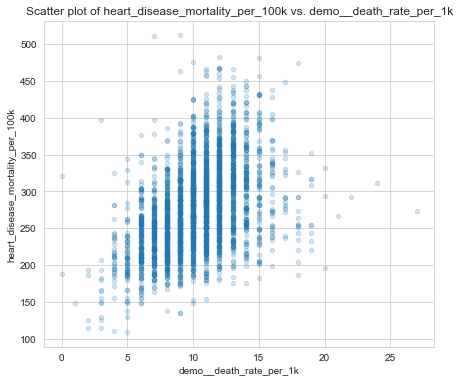

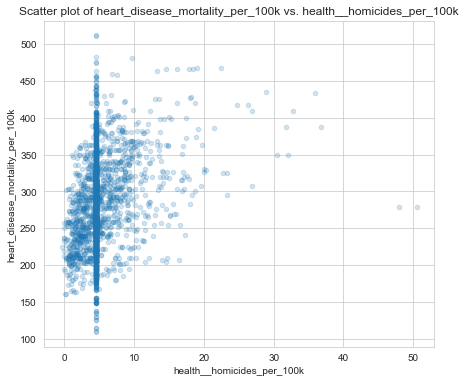

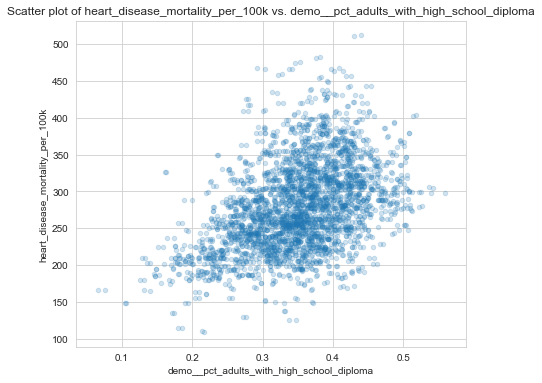

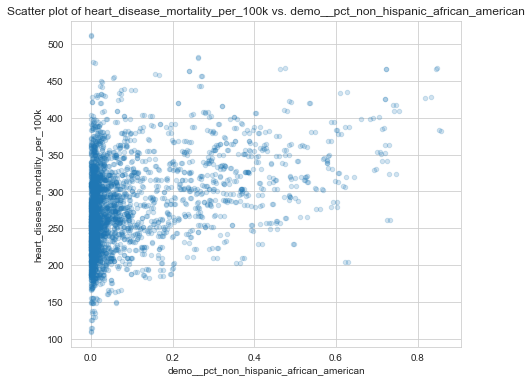

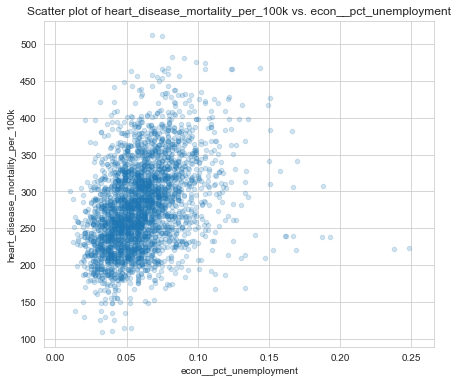

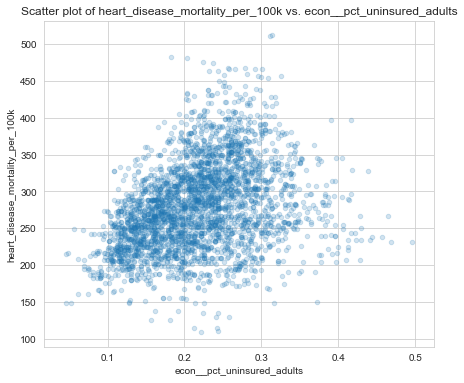

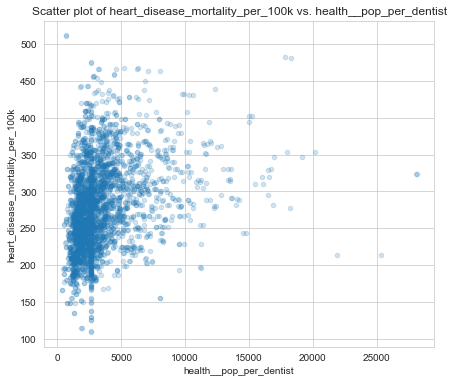

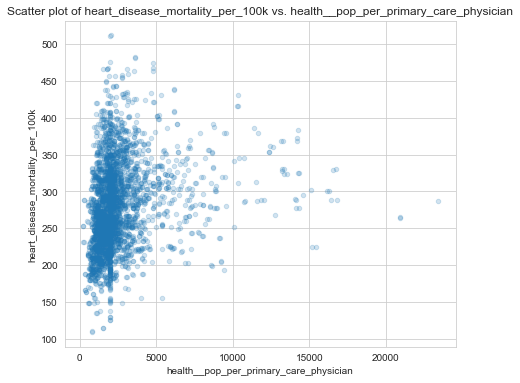

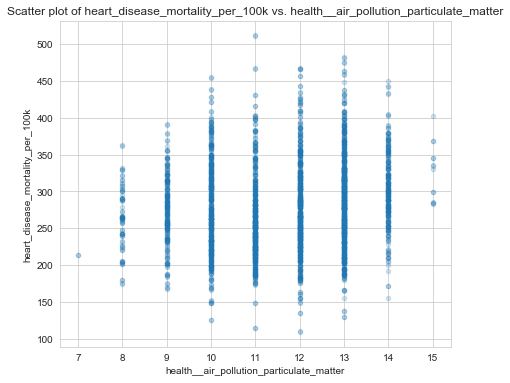

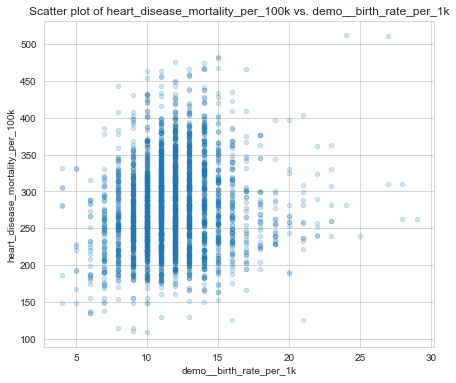

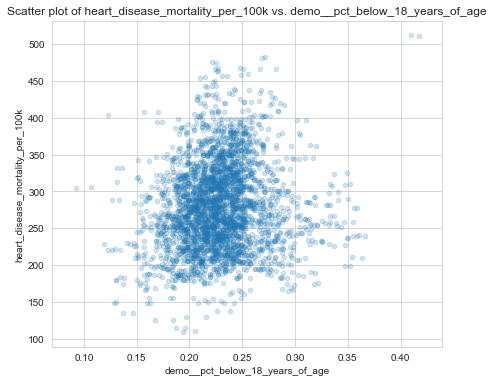

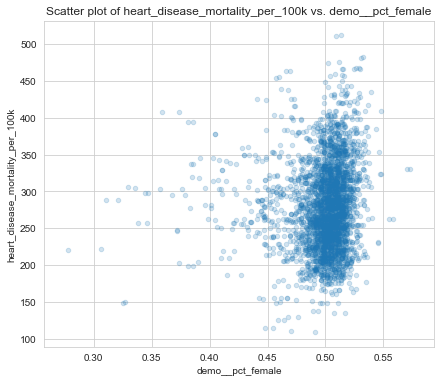

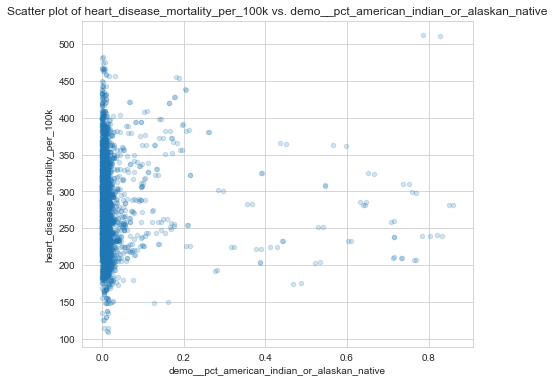

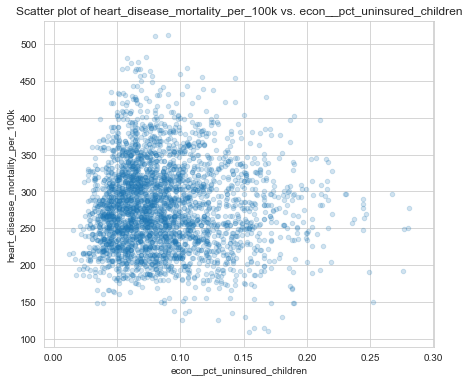

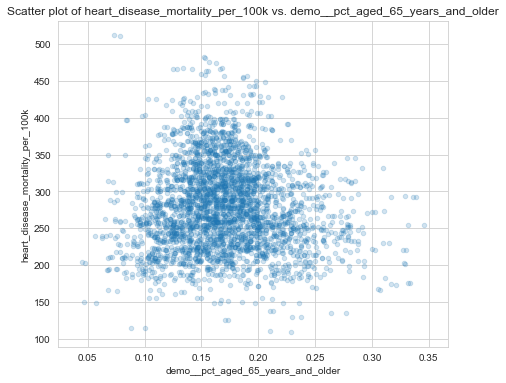

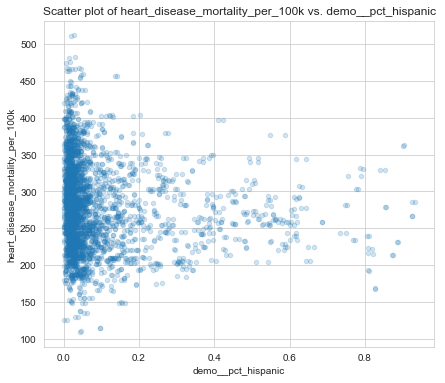

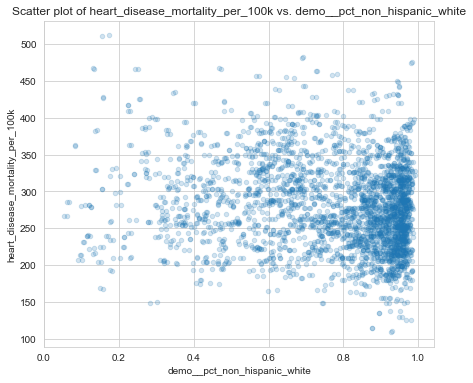

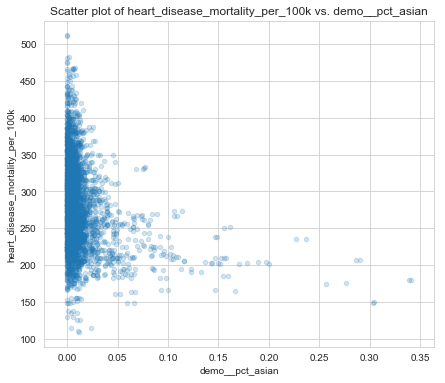

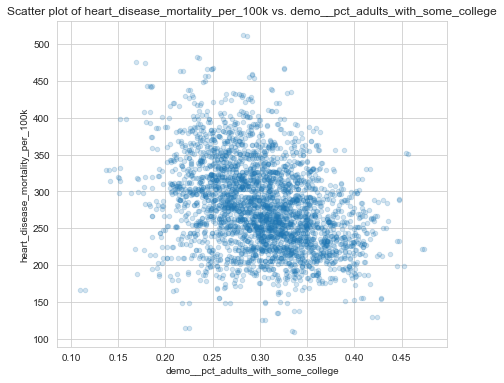

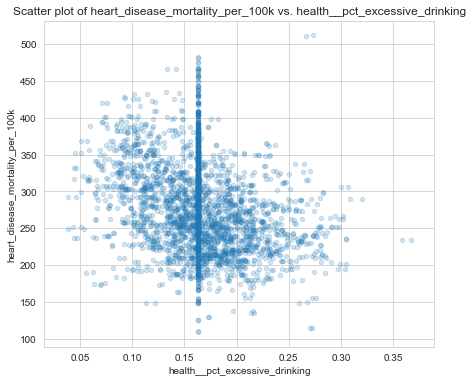

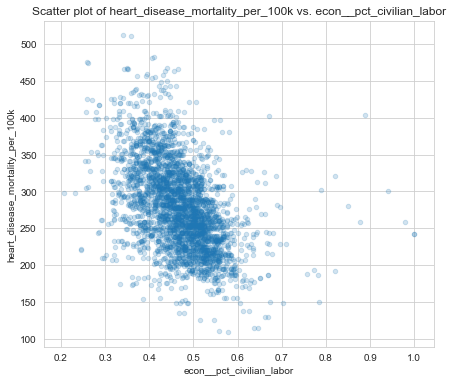

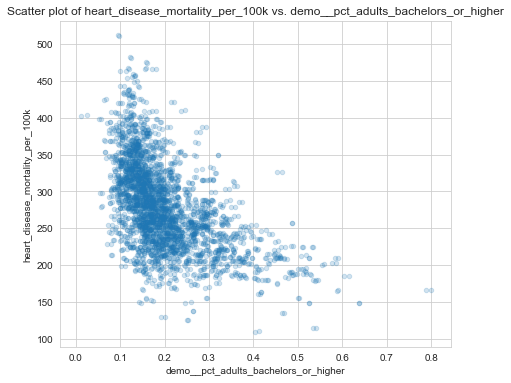

In [29]:
def plot_scatter_t(train, cols, col_y = "heart_disease_mortality_per_100k", alpha = 1.0):
    for col in cols:
        fig = plt.figure(figsize=(7,6)) 
        ax = fig.gca()    
        train.plot.scatter(x = col, y = col_y, ax = ax, alpha = alpha)
        ax.set_title('Scatter plot of ' + col_y + ' vs. ' + col) 
        ax.set_xlabel(col) 
        ax.set_ylabel(col_y)
        plt.show()

plot_scatter_t(train, num_cols, alpha = 0.2)

# Visualizing the scatter plots to see the relationship for the every feature with the heart disease mortality

def plot_scatter_t(train, cols, col_y = "heart_disease_mortality_per_100k", alpha = 1.0):
    for col in cols:
        fig = plt.figure(figsize=(7,6)) 
        ax = fig.gca()    
        train.plot.scatter(x = col, y = col_y, ax = ax, alpha = alpha)
        ax.set_title('Scatter plot of ' + col_y + ' vs. ' + col) 
        ax.set_xlabel(col) 
        ax.set_ylabel(col_y)
        plt.show()

plot_scatter_t(train, num_cols, alpha = 0.2)

Calulating the categorial values count for each features

In [30]:
train["area__rucc"].value_counts()

Nonmetro - Urban population of 2,500 to 19,999, adjacent to a metro area                         608
Nonmetro - Completely rural or less than 2,500 urban population, not adjacent to a metro area    484
Metro - Counties in metro areas of 1 million population or more                                  436
Nonmetro - Urban population of 2,500 to 19,999, not adjacent to a metro area                     418
Metro - Counties in metro areas of 250,000 to 1 million population                               370
Metro - Counties in metro areas of fewer than 250,000 population                                 322
Nonmetro - Completely rural or less than 2,500 urban population, adjacent to a metro area        238
Nonmetro - Urban population of 20,000 or more, adjacent to a metro area                          222
Nonmetro - Urban population of 20,000 or more, not adjacent to a metro area                      100
Name: area__rucc, dtype: int64

In [31]:
train["area__urban_influence"].value_counts()

Small-in a metro area with fewer than 1 million residents                                             692
Large-in a metro area with at least 1 million residents or more                                       436
Noncore adjacent to a small metro with town of at least 2,500 residents                               346
Micropolitan adjacent to a small metro area                                                           262
Micropolitan not adjacent to a metro area                                                             254
Noncore not adjacent to a metro/micro area and does not contain a town of at least 2,500 residents    210
Noncore adjacent to micro area and does not contain a town of at least 2,500 residents                210
Noncore adjacent to micro area and contains a town of 2,500-19,999 residents                          206
Noncore adjacent to a small metro and does not contain a town of at least 2,500 residents             176
Noncore adjacent to a large metro area        

In [32]:
train["econ__economic_typology"].value_counts()

Nonspecialized                        1266
Manufacturing-dependent                494
Farm-dependent                         482
Federal/State government-dependent     390
Recreation                             312
Mining-dependent                       254
Name: econ__economic_typology, dtype: int64

In [33]:
train["yr"].value_counts()

a    1599
b    1599
Name: yr, dtype: int64

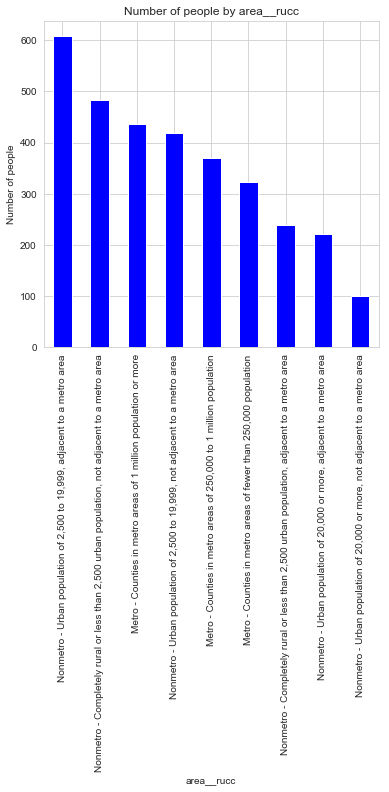

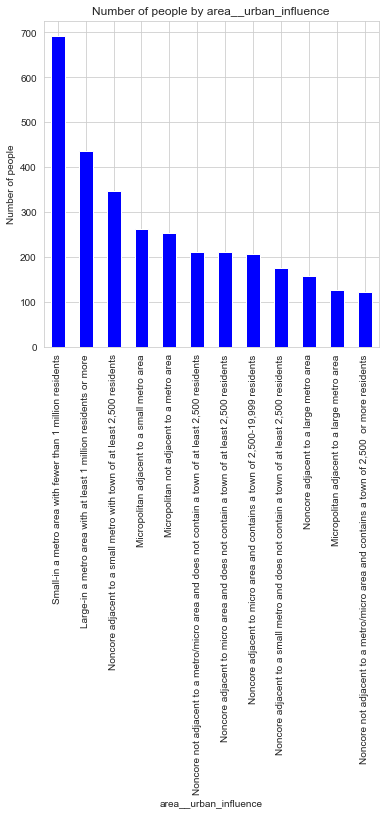

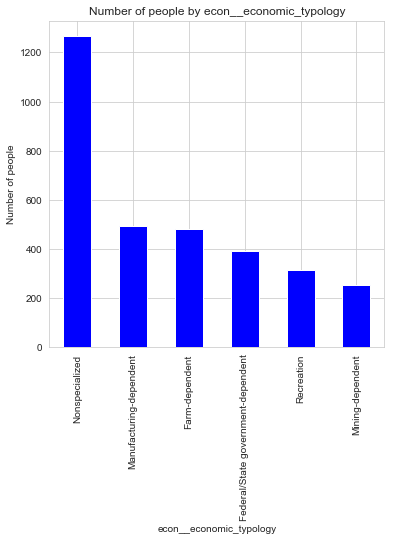

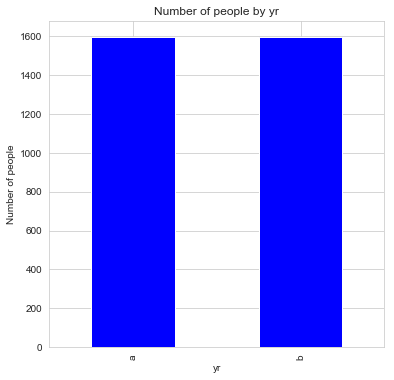

In [34]:
## Visualizing the counts of every features

cat_cols = ["area__rucc", "area__urban_influence", "econ__economic_typology", 
             "yr"]

def plot_bars(train, cols):
    for col in cols:
        fig = plt.figure(figsize=(6,6)) 
        ax = fig.gca()     
        counts = train[col].value_counts() 
        counts.plot.bar(ax = ax, color = 'blue') 
        ax.set_title('Number of people by ' + col) 
        ax.set_xlabel(col) 
        ax.set_ylabel('Number of people')
        plt.show()


plot_bars(train, cat_cols)

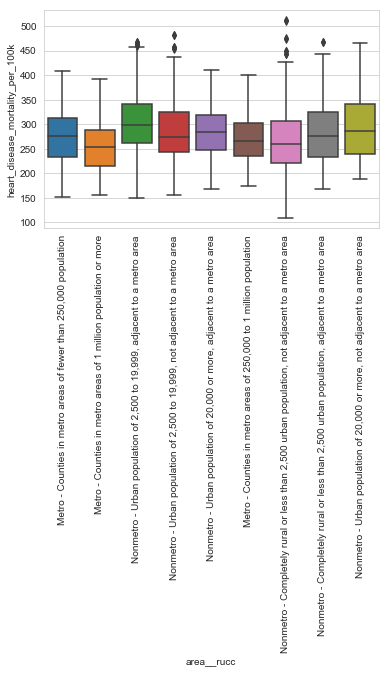

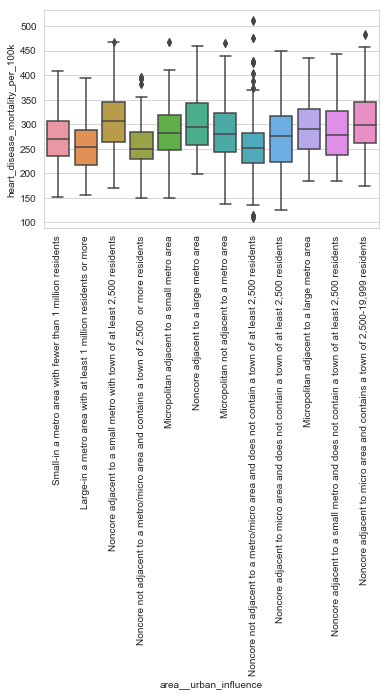

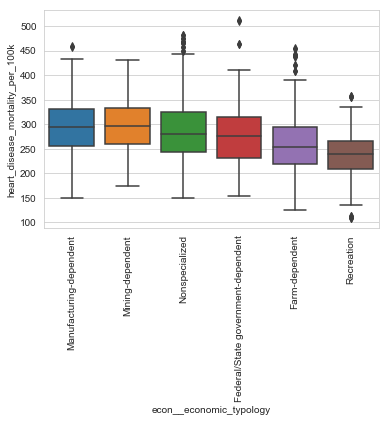

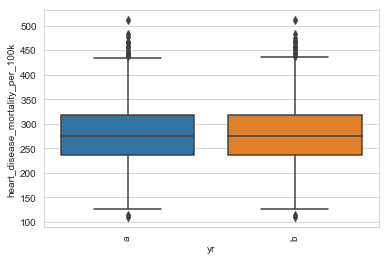

In [35]:
def plot_box(train, cols, col_y = "heart_disease_mortality_per_100k"):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col, col_y, data = train)
        plt.xlabel(col) 
        plt.ylabel(col_y)
        plt.xticks(rotation=90)
        plt.show()
        
plot_box(train, cat_cols) 

Separating the label from training data set and encoding the all categorial variables to dummy variables

In [36]:
train.drop(["heart_disease_mortality_per_100k"], axis=1, inplace=True)

In [37]:
train = pd.get_dummies(train)
train.shape

(3198, 58)

In [38]:
test = pd.get_dummies(test)
test.shape

(3080, 58)

# Spliting the data for trianing(80%) and testing(20%)

In [39]:
x_train, x_test, y_train, y_test = train_test_split(train, label, shuffle=True, train_size=0.8, random_state=0)

In [43]:
## stasarzing the values
scale = StandardScaler()
scale.fit(x_train)
x_train = scale.transform(x_train)
x_test = scale.transform(x_test)

# BenchMark Models

In [44]:
classification1 = SVC(kernel="rbf",random_state=10)
classififcation1=classification1.fit(x_test, y_test)
pred1=classification1.predict(x_test)
print("accuracy score of SVM is")
score=metrics.accuracy_score(y_test,pred1)
print(score)
classification2=LogisticRegression(random_state=10,max_iter=10,C=2.0)
classification2=classification2.fit(x_test,y_test)
pred2=classification2.predict(x_test)
print(" accuracy score of Logistic Regression is")
score1=metrics.accuracy_score(y_test,pred2)
print(score1)


accuracy score of SVM is
0.3609375
 accuracy score of Logistic Regression is
0.9109375
